In [2]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 217.9 kB/s eta 0:07:38
   ---------------------------------------- 0.0/99.8 MB 217.9 kB/s eta 0:07:38
   ---------------------------------------- 0.1/99.8 MB 252.2 kB/s eta 0:06:36
   ---------------------------------------- 0.1/99.8 MB 306.3 kB/s eta 0:05:26
   ---------------------------------------- 0.1/99.8 MB 344.8 kB/s eta 0:04:49
   ---------------------------------------- 0.1/99.8 MB 361.0 kB/s eta 0:04:36
   --------------------------------------

In [24]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv(r"C:\Users\USER\Desktop\DATA  SCIENCE\Excel Workbooks Tsi\heart_tidy.csv")

In [6]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,CholesterolLevel,FastingBloodSugar,RestingElectrocardiographicResult,MaxHeartRate,ExerciseAngina,STDepression,STSegmentSlope,NumMajorVessels,ThalliumStressRest,HeartDiseasePresent,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,NaN,NaN,NaN,NaN,NaN
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,NaN,NaN,NaN,NaN,NaN
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,NaN,NaN,NaN,NaN,NaN
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,NaN,NaN,NaN,NaN,NaN
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,NaN,NaN,NaN,NaN,NaN
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0,NaN,NaN,NaN,NaN,NaN
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1,NaN,NaN,NaN,NaN,NaN
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0,NaN,NaN,NaN,NaN,NaN
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1,NaN,NaN,NaN,NaN,NaN
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.drop(['Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18'], axis=1)

In [8]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,CholesterolLevel,FastingBloodSugar,RestingElectrocardiographicResult,MaxHeartRate,ExerciseAngina,STDepression,STSegmentSlope,NumMajorVessels,ThalliumStressRest,HeartDiseasePresent
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1


## Metrics For Classification

# CLASSIFICATION

In [42]:
# Splitting the data into predictors (X) and target variable (y)
Xc = df.drop('HeartDiseasePresent', axis=1)
yc = df['HeartDiseasePresent']

# Splitting the data into training and testing sets
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2,
random_state=42)

# Creating an XGBoost regressor
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1,
random_state=42)

# Training the XGBoost regressor
xgb_classifier.fit(Xc_train, yc_train)

# Making predictions on the test set
yc_pred = xgb_classifier.predict(Xc_test)


In [43]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
import sklearn.metrics as metrics

In [45]:
print("The results of our XGBoost Model: ")
print("Accuracy:", "%.6f" % metrics.accuracy_score(yc_test, yc_pred))
print("Precision:", "%.6f" % metrics.precision_score(yc_test, yc_pred))
print("Recall:", "%.6f" % metrics.recall_score(yc_test, yc_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(yc_test, yc_pred))

The results of our XGBoost Model: 
Accuracy: 0.833333
Precision: 0.851852
Recall: 0.793103
F1 Score: 0.821429


In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

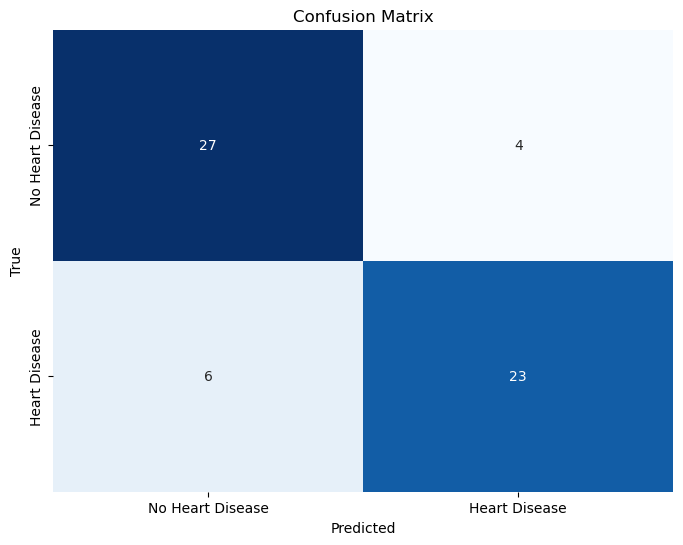

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(yc_test, yc_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
